# Disciplina de Inteligência Artifical
Explorando base de dados iris

## Proposta
A proposta da atividade é executar dois métodos supervisionados à escolha do aluno e o método não supervisionado k-means. Nesta atividade serão executados três métodos, são eles: Naive Bayes, Support Vector Machines e, por fim, k-means.

Importação das bibliotecas necessárias para a execução dos métodos:

In [70]:
from sklearn import datasets,svm
import matplotlib.pyplot as plt
import numpy
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans

Leitura da base de dados iris:

In [71]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target 

Demonstração gráfica dos pontos carregados:

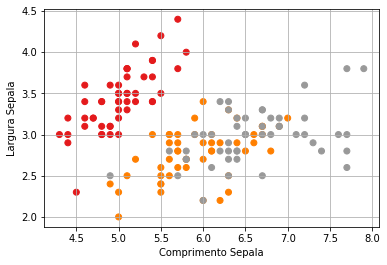

In [72]:
plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Comprimento Sepala')
plt.ylabel('Largura Sepala')
plt.grid(True)
plt.show()

Obtendo o dados de treinamento:

In [73]:
yt = numpy.concatenate([y[:40], y[51:90], y[101:140]])
xt = numpy.concatenate([X[:40,:], X[51:90,:], X[101:140,:]])

Dados para validação:

In [74]:
yv = numpy.concatenate([y[40:50], y[90:100], y[140:150]])
xv = numpy.concatenate([X[40:50,:], X[90:100,:], X[140:150,:]])

# Método Gaussiano Naive Bayes

In [75]:
gnb = GaussianNB()

Treinamento do método Gaussiano Naive Bayes:

In [76]:
gnb.fit(xt,yt)

GaussianNB(priors=None, var_smoothing=1e-09)

Predição do método Gaussiano Naive Bayes comparado aos dados reais:

In [77]:
gnb_predicao = gnb.predict(xv)
print(yv)
print(gnb_predicao)


[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 1 2 2 1]


# Método Support Vector Machines

In [78]:
svm_c = svm.SVC()

Treinamento do SVM:

In [79]:
svm_c.fit(xt,yt)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Predição do método SVM comparado aos dados reais:

In [80]:
svm_predicao = svm_c.predict(xv)
print(yv)
print(svm_predicao)


[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 1 2 1 1]


# Método K-means

In [81]:
metodo_kmeans = KMeans(n_clusters= 3)

Treinamento do método K-means

In [82]:
metodo_kmeans.fit(xt, yt)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Predição do método K-means comparado aos dados reais

In [83]:
kmeans_predicao = metodo_kmeans.predict(xv)
print(yv)
print(kmeans_predicao)


[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1]


#Matrizes de confusão 
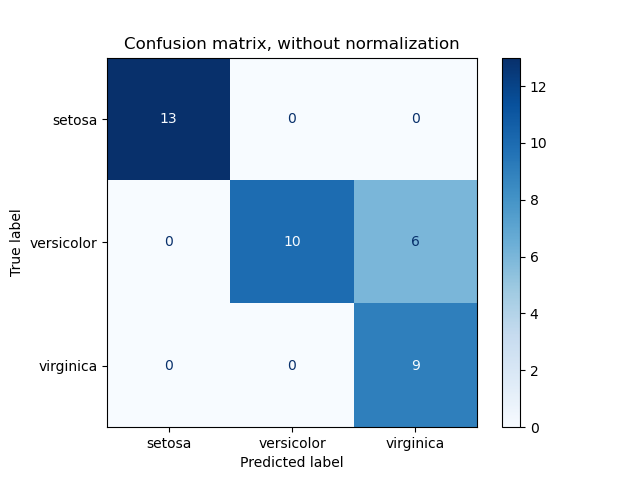


**Support Vector Machine**

In [84]:
print(confusion_matrix(yv, svm_predicao))

[[10  0  0]
 [ 0 10  0]
 [ 0  4  6]]


**Naive Bayes**

In [85]:
print(confusion_matrix(yv, gnb_predicao))

[[ 9  1  0]
 [ 0 10  0]
 [ 0  3  7]]


**K-means**

In [86]:
print(confusion_matrix(yv, kmeans_predicao))

[[ 0  0 10]
 [ 0 10  0]
 [ 6  4  0]]


# Resultados Finais

**Support Vector Machine**

In [87]:
print(classification_report(yv, svm_predicao))
print(f'Quantidade de falos positivos: {(yv!=svm_predicao).sum()}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.71      1.00      0.83        10
           2       1.00      0.60      0.75        10

    accuracy                           0.87        30
   macro avg       0.90      0.87      0.86        30
weighted avg       0.90      0.87      0.86        30

Quantidade de falos positivos: 4


**Naive Bayes**

In [88]:
print(classification_report(yv, gnb_predicao))
print(f'Quantidade de falsos positivos: {(yv!=gnb_predicao).sum()}')

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.71      1.00      0.83        10
           2       1.00      0.70      0.82        10

    accuracy                           0.87        30
   macro avg       0.90      0.87      0.87        30
weighted avg       0.90      0.87      0.87        30

Quantidade de falsos positivos: 4


**K-means**

In [90]:
print(classification_report(yv, kmeans_predicao))
print(f'Quantidade de falsos positivos: {(yv!=kmeans_predicao).sum()}')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.71      1.00      0.83        10
           2       0.00      0.00      0.00        10

    accuracy                           0.33        30
   macro avg       0.24      0.33      0.28        30
weighted avg       0.24      0.33      0.28        30

Quantidade de falsos positivos: 20
